In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import tensorflow as tf

### Loading the data

In [2]:
train = pd.read_csv("./sign_mnist_train.csv")

test = pd.read_csv("./sign_mnist_test.csv")


In [3]:
train.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255
6,8,134,134,135,135,136,137,137,138,138,...,109,102,91,65,138,189,179,181,181,179
7,22,114,42,74,99,104,109,117,127,142,...,214,218,220,223,223,225,227,227,228,228
8,3,169,174,176,180,183,185,187,188,190,...,119,118,123,120,118,114,94,74,61,57
9,3,189,189,189,190,190,191,190,190,190,...,13,53,200,204,201,201,193,175,178,156


In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
label,27455.0,12.318813,7.287552,0.0,6.0,13.0,19.0,24.0
pixel1,27455.0,145.419377,41.358555,0.0,121.0,150.0,174.0,255.0
pixel2,27455.0,148.500273,39.942152,0.0,126.0,153.0,176.0,255.0
pixel3,27455.0,151.247714,39.056286,0.0,130.0,156.0,178.0,255.0
pixel4,27455.0,153.546531,38.595247,0.0,133.0,158.0,179.0,255.0
...,...,...,...,...,...,...,...,...
pixel780,27455.0,162.736696,63.444008,0.0,125.0,184.0,207.0,255.0
pixel781,27455.0,162.906137,63.509210,0.0,128.0,184.0,207.0,255.0
pixel782,27455.0,161.966454,63.298721,0.0,128.0,182.0,206.0,255.0
pixel783,27455.0,161.137898,63.610415,0.0,128.0,182.0,204.0,255.0


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


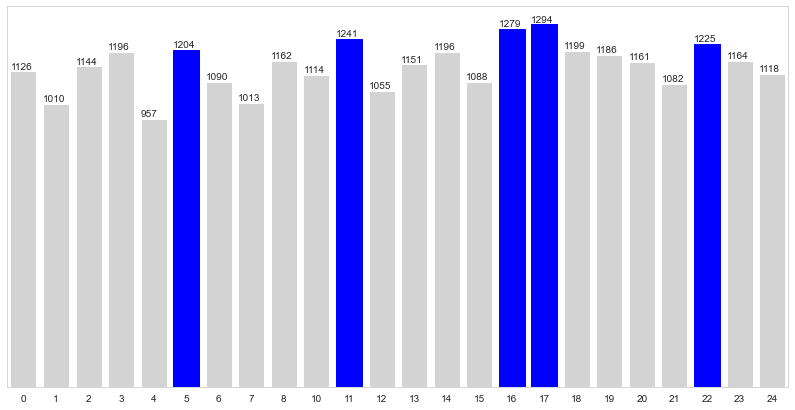

In [5]:
# Plotting for the label having more than 1200 rows.
sns.set_style("whitegrid")
plt.figure(figsize=(14,7))
g = sns.countplot(train['label'], color='lightgrey')

for p in g.patches:
    g.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+10))
    if p.get_height() > 1200:
        p.set_color('blue')
g.set_ylabel('')    
g.set_xlabel('')
g.axes.get_yaxis().set_visible(False)

In [6]:
# Data splitting and PreProcessing 
training_images = train.iloc[:,1:].values
training_labels = train.iloc[:,0].values

testing_images = test.iloc[:,1:].values
testing_labels = test.iloc[:,0].values

training_images = training_images.reshape(-1,28,28,1)
testing_images = testing_images.reshape(-1,28,28,1)

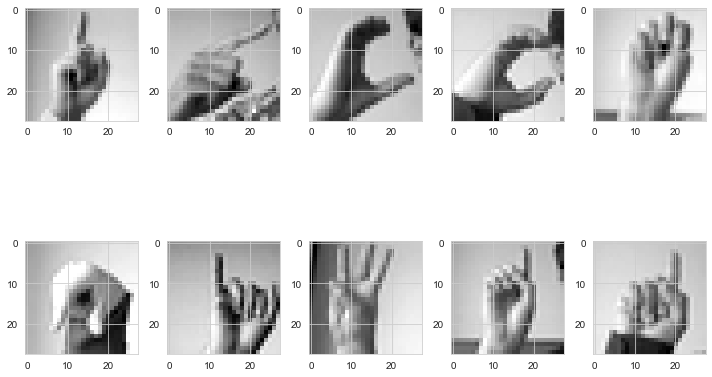

In [7]:
# Plotting the first 10 images 
fig, ax = plt.subplots(2,5) 
fig.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(training_images[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()

In [8]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 rotation_range=40,
                                 fill_mode='nearest',
                                 zoom_range=0.2,
                                 shear_range=0.2,
                                 horizontal_flip=True)

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [9]:
# Model Building for the data

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import RMSprop

model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(25,activation='softmax')
])

model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 15488)             0         
                                                                 
 dropout (Dropout)           (None, 15488)             0         
                                                                 
 dense (Dense)               (None, 512)               7930368   
                                                        

In [10]:
train_generator = train_datagen.flow(training_images, training_labels)
valid_generator = validation_datagen.flow(testing_images, testing_labels)

history = model.fit(train_generator,
                    epochs=5,
                    verbose=1,
                   validation_data = valid_generator)

model.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/5
858/858 [==============================] - 206s 237ms/step - loss: 2.7740 - accuracy: 0.1583 - val_loss: 1.8056 - val_accuracy: 0.3843
Epoch 2/5
858/858 [==============================] - 202s 235ms/step - loss: 2.0381 - accuracy: 0.3462 - val_loss: 1.6103 - val_accuracy: 0.4479
Epoch 3/5
858/858 [==============================] - 219s 254ms/step - loss: 1.6665 - accuracy: 0.4552 - val_loss: 0.9887 - val_accuracy: 0.6485
Epoch 4/5
858/858 [==============================] - 220s 256ms/step - loss: 1.4502 - accuracy: 0.5262 - val_loss: 0.8551 - val_accuracy: 0.6873
Epoch 5/5
858/858 [==============================] - 222s 258ms/step - loss: 1.2643 - accuracy: 0.5774 - val_loss: 0.7146 - val_accuracy: 0.7223


[133.85513305664062, 0.5637200474739075]